In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt

In [45]:
# read the standard data from csv file
df_standard = pd.read_csv('./original data/standard data.csv', index_col=0)

In [46]:
# show the first 5 rows of the dataframe
df_standard.head()

,pure C6H6,aq #1,aq #2,aq #3,aq #4,aq #5,aq #6,pure EtOH
weight_0,NaN,15.107000,15.362000,15.374000,15.670000,15.334000,14.247000,NaN
weight_EtOH,NaN,15.876000,16.892000,17.710000,18.783000,19.175000,18.913000,NaN
weight_C6H6,NaN,20.423000,20.689000,20.760000,21.051000,20.702000,19.670000,NaN
w_EtOH,0.0000,0.144658,0.287216,0.433717,0.578517,0.715537,0.860409,1.000
refraction_index,1.4238,1.414000,1.402500,1.392300,1.383000,1.374000,1.364500,1.359


In [11]:
standard_w_list = df_standard.iloc[3,:].tolist()
standard_RI_list = df_standard.iloc[4,:].tolist()

In [56]:
def Interpolate_Calculation(x):
    '''
    argument: x: a specific value of refractive index (float)
    return: composition of the gas/liquid phase
    '''
    for i in range(7):
        if x < standard_RI_list[i] and x > standard_RI_list[i+1]:
            break
    index = i
    """
    use interpolate method to calculate composition:
    (RI[index]-x)/(w[index]-w) = (x-RI[index+1])/(w-w[index+1])
    here w is the target value (the composition)
    """
    slope = (standard_RI_list[index]-standard_RI_list[index+1])/(standard_w_list[index]-standard_w_list[index+1])
    w = standard_w_list[index]-(standard_RI_list[index]-x)/slope
    return w

In [233]:
# read the experiment data from csv file
df_experiment = pd.read_csv('./original data/experiment data.csv')

In [234]:
# show the first 5 rows of the dataframe
df_experiment.head()

,Tb,RI (g),RI (l)
0,76.4,1.4185,1.4235
1,73.8,1.4125,1.4220
2,68.5,1.4032,1.4170
3,66.3,1.4012,1.4130
4,64.5,1.3985,1.4080


In [235]:
boiling_T_list = df_experiment.iloc[:, 0].tolist()
experiment_RI_gas = df_experiment.iloc[:,1].tolist()
experiment_RI_liquid = df_experiment.iloc[:,2].tolist()

In [236]:
composition_gas = [Interpolate_Calculation(RI) for RI in experiment_RI_gas]
composition_gas.insert(0,0)  

In [237]:
composition_liquid = [Interpolate_Calculation(RI) for RI in experiment_RI_liquid]
composition_liquid.insert(0,0)

In [238]:
boiling_T_list.insert(0,79.9)  

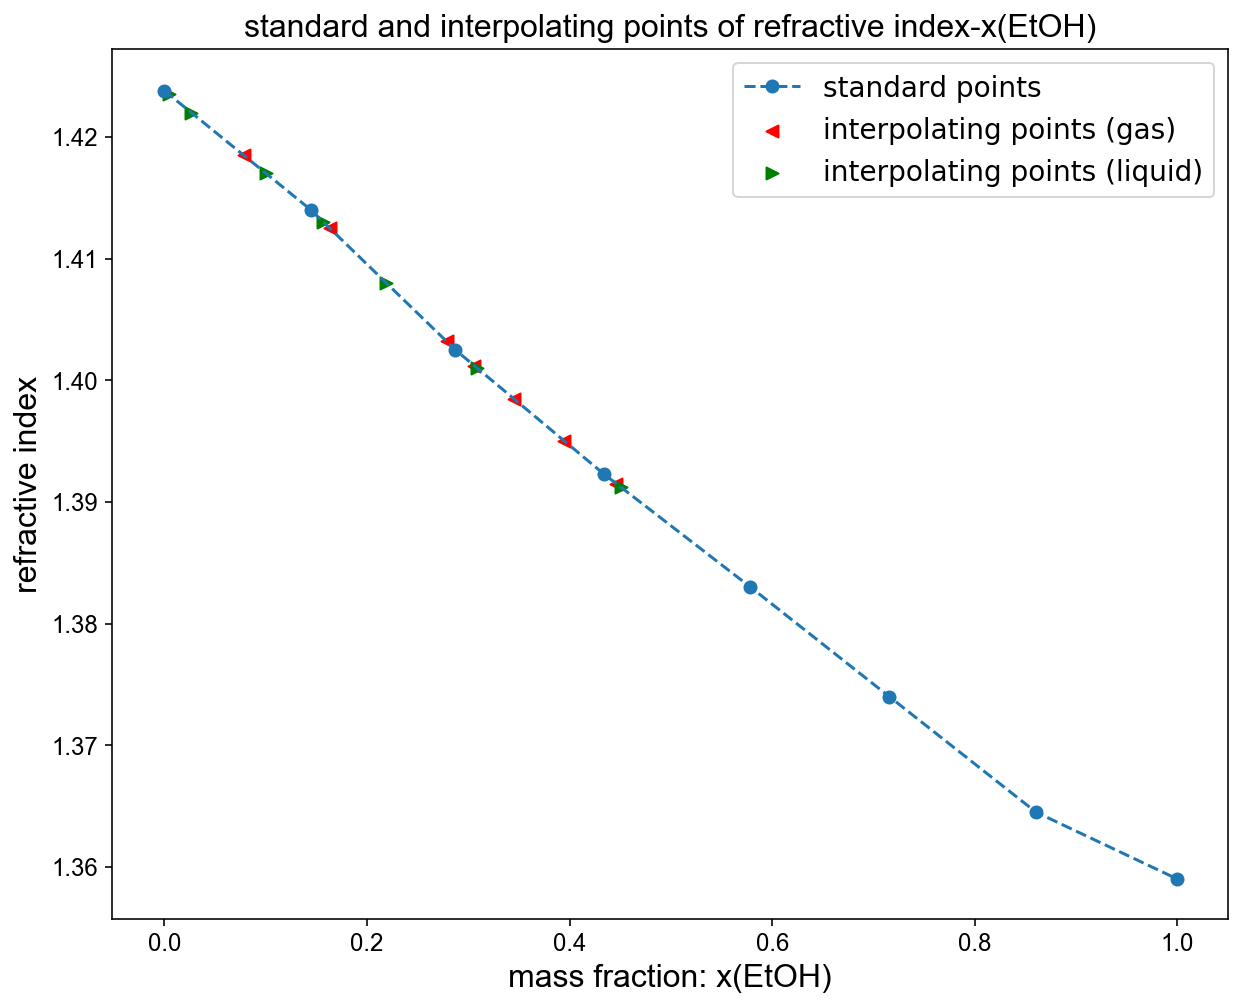

In [262]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(standard_w_list, standard_RI_list, '--o')
ax.scatter([Interpolate_Calculation(RI) for RI in experiment_RI_gas], experiment_RI_gas, c = 'r', marker = '<')
ax.scatter([Interpolate_Calculation(RI) for RI in experiment_RI_liquid], experiment_RI_liquid, c = 'g', marker = '>')
ax.legend(['standard points', 'interpolating points (gas)', 'interpolating points (liquid)'], fontsize = 14)
ax.set_xlabel('mass fraction: x(EtOH)', fontname='Arial', fontsize=16)
ax.set_ylabel('refractive index', fontname='Arial', fontsize=16)
plt.xticks(fontsize = 12, fontname = 'Arial')
plt.yticks(fontsize = 12, fontname = 'Arial')
plt.title('standard and interpolating points of refractive index-x(EtOH)', fontsize = 16, fontname = 'Arial')
plt.show()
fig.savefig('figures/standard_and_interpolate.png', dpi=600, format='png')

In [281]:
# read the data from my co-fellow student
co_df = pd.read_csv('./original data/part_from_tjc.csv')

In [282]:
# show the first 5 lines of co_df
co_df.head()

,x_gas,x_liquid,Tb
0,1.000000,1.000000,78.2
1,0.887500,0.935937,77.5
2,0.767188,0.917188,75.5
3,0.710938,0.903125,74.0
4,0.595313,0.843750,72.0


In [283]:
co_composition_gas = co_df.iloc[:,0].tolist()
co_composition_liquid = co_df.iloc[:,1].tolist()
co_boiling_T_list = co_df.iloc[:,2].tolist()

In [296]:
# combine the data
# gas composition list
final_composition_gas = [composition_gas[i] for i in range(5)]
for i in range(len(co_composition_gas)):
    final_composition_gas.append(co_composition_gas[8-i])
# liquid composition list
final_composition_liquid = [composition_liquid[i] for i in range(5)]
for i in range(len(co_composition_liquid)):
    final_composition_liquid.append(co_composition_liquid[8-i])
# boiling temperature list
final_T_list = [boiling_T_list[i] for i in range(5)]
for i in range(len(co_boiling_T_list)):
    final_T_list.append(co_boiling_T_list[8-i])

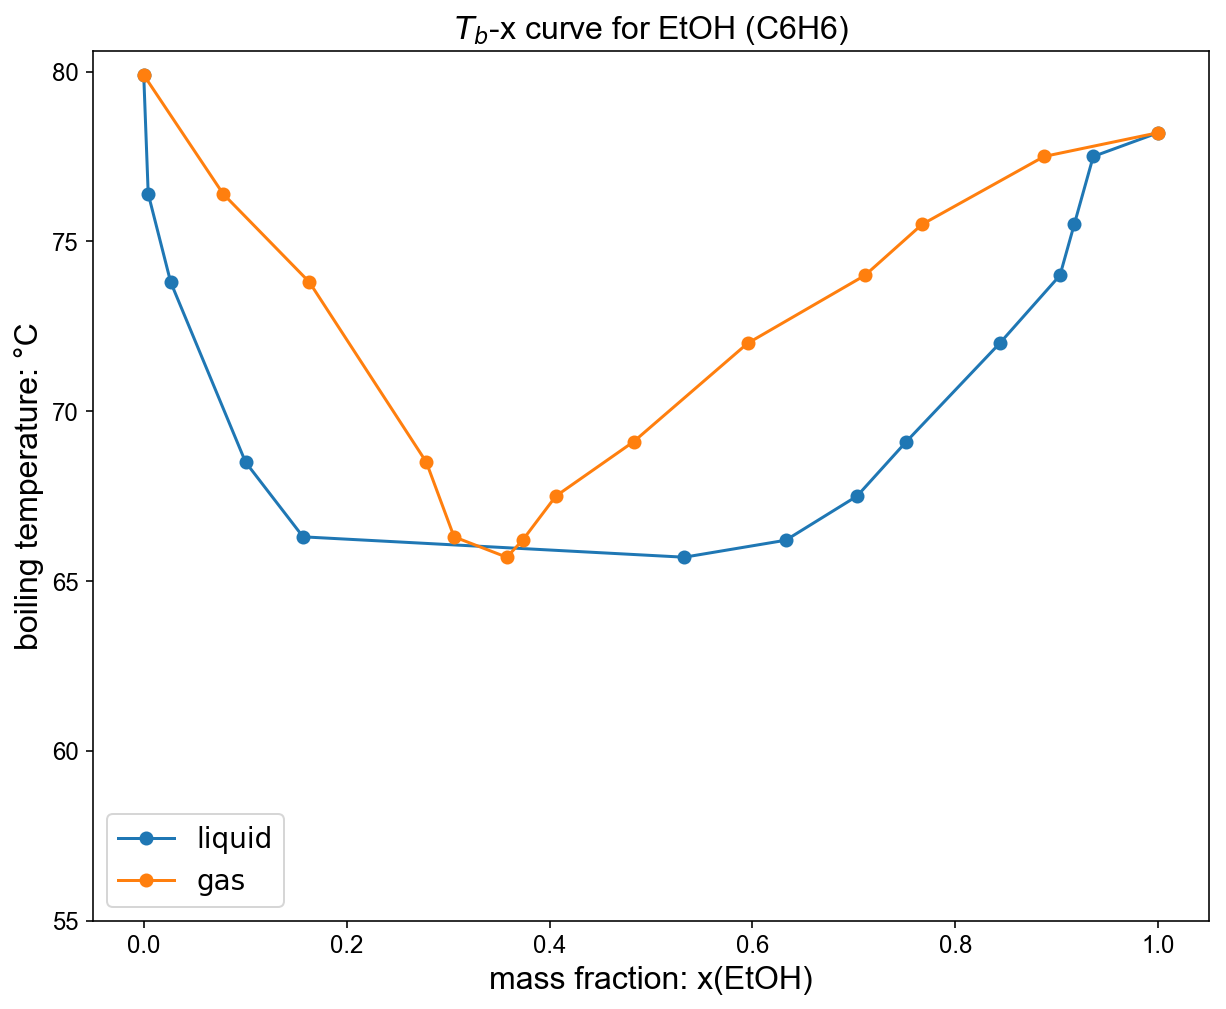

In [303]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(final_composition_liquid, final_T_list, '-o')
ax.plot(final_composition_gas, final_T_list, '-o')
plt.xlim(right = 1.05)
plt.ylim(bottom = 55)
ax.set_xlabel('mass fraction: x(EtOH)', fontname='Arial', fontsize=16)
ax.set_ylabel('boiling temperature: °C', fontname='Arial', fontsize=16)
ax.legend(['liquid', 'gas'], fontsize = 14)
plt.xticks(fontsize = 12, fontname = 'Arial')
plt.yticks(fontsize = 12, fontname = 'Arial')
plt.title('$T_{b}$-x curve for EtOH (C6H6)', fontsize = 16, fontname = 'Arial')
plt.show()
fig.savefig('figures/Tb-x.png', dpi=600, format='png')